<a href="https://colab.research.google.com/github/ravi-0309/Dynamic-Response/blob/main/Vibration_by_Different_Forcing_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

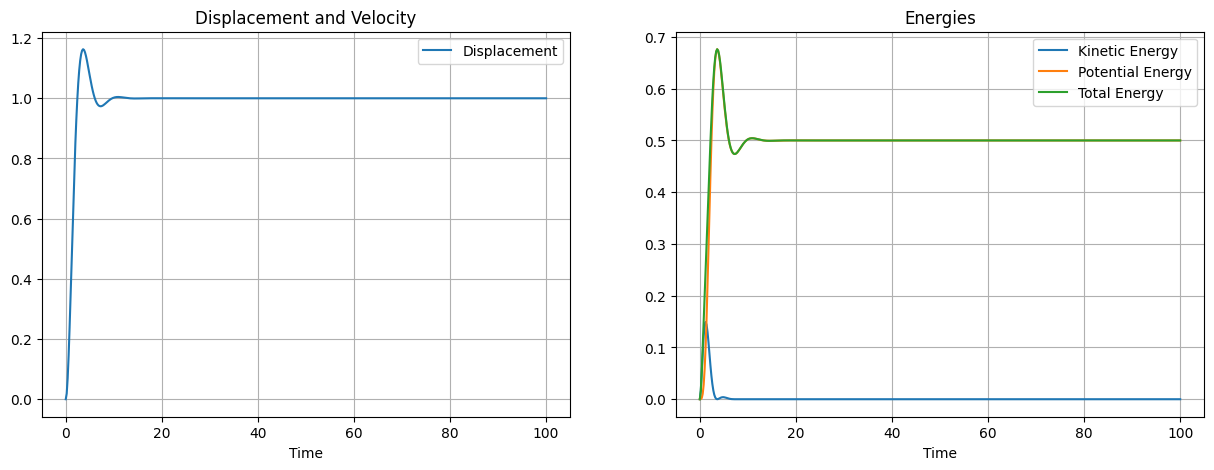

In [ ]:
# CONSTANT FORCE

import numpy as np
import matplotlib.pyplot as plt

# Inputs
m = 1.0
c = 1.0
k = 1.0
F_0 = 1.0
u_0 = 0.0
u_dot_0 = 0.0

ω_n = np.sqrt(k/m) # natural Frequency
c_critical = 2 * np.sqrt(m * k)  # Critical Damping
xi = c/c_critical # Damping Ratio
ω_d = ω_n * np.sqrt(1 - xi**2)  # Damped Frequency
u_static = F_0 / k  # Static Displacement
A = u_0 - F_0 / k
B = (u_0 + xi * ω_n * A) / ω_d

# Generating time array
t = np.linspace(0, 100, 500)

# Displacement and Velocity Functions
u = np.exp(-xi * ω_n * t) * (A * np.cos(ω_d * t) + B * np.sin(ω_d * t)) + u_static
u_dot = np.exp(-xi * ω_n * t) * ((B * ω_d - xi * ω_n * A) * np.cos(ω_d * t) + (-A * ω_d - xi * ω_n * B) * np.sin(ω_d * t))

# Energy Functions
KE = 0.5 * m * u_dot**2
PE = 0.5 * k * u**2
TE = KE + PE

# Plotting Displacement and Velocity
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(t, u, label="Displacement")
# ax[0].plot(t, u_dot, label="Velocity")
ax[0].set_xlabel('Time')
ax[0].set_title('Displacement and Velocity')
ax[0].grid(True)
ax[0].legend()

# Plotting Energies
ax[1].plot(t, KE, label="Kinetic Energy")
ax[1].plot(t, PE, label="Potential Energy")
ax[1].plot(t, TE, label="Total Energy")
ax[1].set_xlabel('Time')
ax[1].set_title('Energies')
ax[1].grid(True)
ax[1].legend()

plt.show()

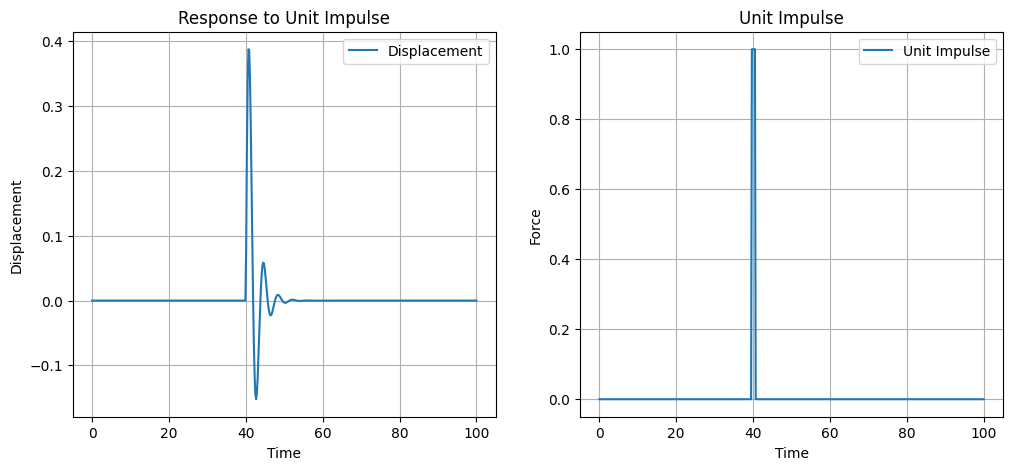

In [ ]:
# UNIT IMPULSE

import numpy as np
import matplotlib.pyplot as plt

# Inputs
m = 1.0
c = 1.0
k = 3.0
tau = 40.0 # Time of Unit Impulse

# Generating time array
time = np.linspace(0, 100, 500)

# Forcing Function
F = []
for t in time:
  t = round(t, 0)
  if t != tau:
    F.append(0)
  else:
    F.append(1)

ω_n = np.sqrt(k/m) # Natural Frequency
c_critical = 2 * np.sqrt(m * k)  # Critical Damping
xi = c/c_critical # Damping Ratio
ω_d = ω_n * np.sqrt(1-xi**2) # Damped  Frequency

x = []
# Generating Displacement array
for t in time:
  if t < tau:
    x.append(0)
  else:
    x.append(np.exp(-xi * ω_n * (t-tau)) * (np.sin(ω_d * (t-tau))) / (m * ω_d))

# Plotting
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(time, x, label = 'Displacement')
ax[1].plot(time, F, label = 'Unit Impulse')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Displacement')
ax[0].set_title('Response to Unit Impulse')
ax[0].grid(True)
ax[0].legend()
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Force')
ax[1].set_title('Unit Impulse')
ax[1].grid(True)
ax[1].legend()

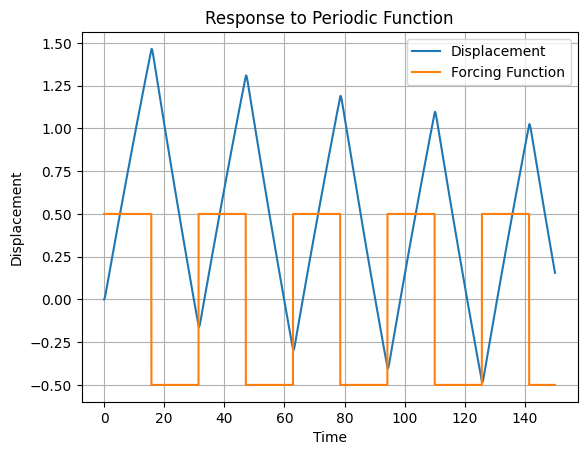

In [ ]:
# RESPONSE TO PERIODIC RAMP FUNCTION

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Input Parameters
m = 1.0
c = 5.0
k = 0.04
T = np.pi*10.0 # Time Period of the Forcing Function

# Time Values
dt = 0.01
time = np.arange(0, 150, dt)

# Matrices and Arrays
A = np.array([[m, 0], [0, 1]])
A_inv = inv(A)
B = np.array([[c, k], [-1, 0]])

# Empty Arrays
positions = []
velocities = []

# Forcing Function
F_0 = 0.5
def F(t):
  if (t // (T/2.0)) % 2 == 0:
    return np.array([F_0, 0])
  else:
    return np.array([-F_0, 0])

# Initial Conditions
x_i = 0.0
x_i_d = 0.0
x_i_dd = (F(0) - c*x_i_d - k*x_i) / m

force = []
for t in time:
  f = F(t)[0]
  force.append(f)

# Slope Function
def G(y, t):
  return A_inv.dot(F(t) - B.dot(y))

# RK4 Function
def RK4(y, t):
  k1 = G(y, t)
  k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
  k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
  k4 = G(y + k3*dt, t + dt)
  return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0

y_i = np.array([x_i_d, x_i])
for t in time:
  positions.append(y_i[1])
  velocities.append(y_i[0])
  y_i = y_i + RK4(y_i, t)

# Plotting Curves
plt.plot(time, positions, label = 'Displacement')
plt.plot(time, force, label = 'Forcing Function')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Response to Periodic Function')
plt.legend()
plt.show()


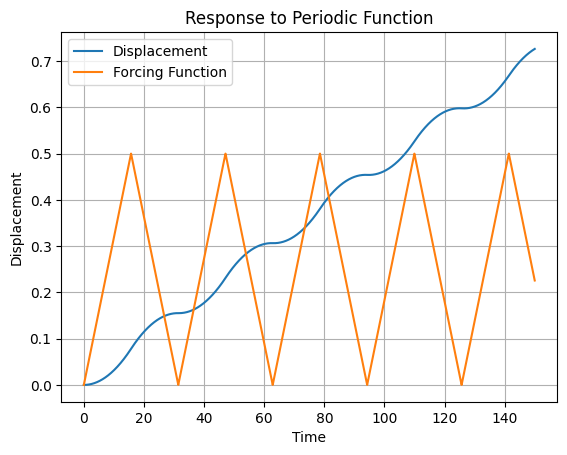

In [ ]:
# RESPONSE TO PERIODIC TRIANGULAR IMPULSE FUNCTION

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Input Parameters
m = 1.0
c = 50.0
k = 0.04
T = np.pi*10.0 # Time Period of the Forcing Function

# Time Values
dt = 0.01
time = np.arange(0, 150, dt)

# Matrices and Arrays
A = np.array([[m, 0], [0, 1]])
A_inv = inv(A)
B = np.array([[c, k], [-1, 0]])

# Empty Arrays
positions = []
velocities = []

# Forcing Function
F_0 = 0.5
def F(t):
  if (t // (T/2.0)) % 2 == 0:
    F_val = (2*F_0*t/T) - F_0*(t // (T/2.0))
    return np.array([F_val, 0])
  else:
    F_val = (-2*F_0*t/T) + F_0*(t // (T/2.0)) + F_0
    return np.array([F_val, 0])

# Initial Conditions
x_i = 0.0
x_i_d = 0.0
x_i_dd = (F(0) - c*x_i_d - k*x_i) / m

force = []
for t in time:
  f = F(t)[0]
  force.append(f)

# Slope Function
def G(y, t):
  return A_inv.dot(F(t) - B.dot(y))

# RK4 Function
def RK4(y, t):
  k1 = G(y, t)
  k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
  k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
  k4 = G(y + k3*dt, t + dt)
  return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0

y_i = np.array([x_i_d, x_i])
for t in time:
  positions.append(y_i[1])
  velocities.append(y_i[0])
  y_i = y_i + RK4(y_i, t)

# Plotting Curves
plt.plot(time, positions, label = 'Displacement')
plt.plot(time, force, label = 'Forcing Function')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Response to Periodic Function')
plt.legend()
plt.show()


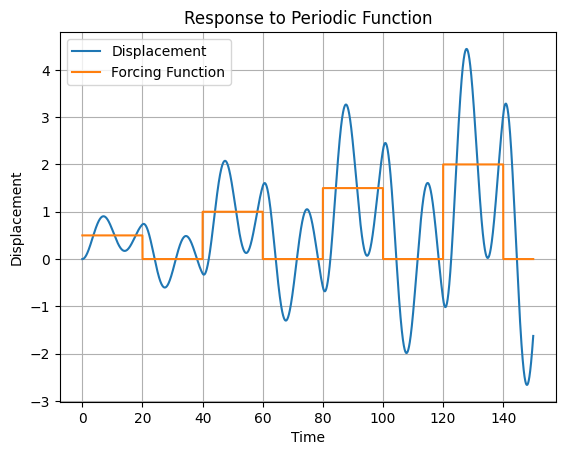

In [ ]:
# RESPONSE TO PERIODIC STEP FUNCTION

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Input Parameters
m = 5.0
c = 0.3
k = 1.0
T = 40.0 # Time Period of the Forcing Function

# Time Values
dt = 0.01
time = np.arange(0, 150, dt)

# Matrices and Arrays
A = np.array([[m, 0], [0, 1]])
A_inv = inv(A)
B = np.array([[c, k], [-1, 0]])

# Empty Arrays
positions = []
velocities = []

# Forcing Function
F_0 = 0.5
def F(t):
  if (t // (T/2.0)) % 2 == 0:
    F_val = F_0 + F_0*(t // (T/2.0))/2.0
    return np.array([F_val, 0])
  else:
    F_val = 0
    return np.array([F_val, 0])

# Initial Conditions
x_i = 0.0
x_i_d = 0.0
x_i_dd = (F(0) - c*x_i_d - k*x_i) / m

force = []
for t in time:
  f = F(t)[0]
  force.append(f)

# Slope Function
def G(y, t):
  return A_inv.dot(F(t) - B.dot(y))

# RK4 Function
def RK4(y, t):
  k1 = G(y, t)
  k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
  k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
  k4 = G(y + k3*dt, t + dt)
  return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0

y_i = np.array([x_i_d, x_i])
for t in time:
  positions.append(y_i[1])
  velocities.append(y_i[0])
  y_i = y_i + RK4(y_i, t)

# Plotting Curves
plt.plot(time, positions, label = 'Displacement')
plt.plot(time, force, label = 'Forcing Function')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Response to Periodic Function')
plt.legend()
plt.show()
